# Part 2.b

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

### Concatenate the data into 1 dataframe for the remainder of the analysis.

In [2]:
year_2000 = pd.read_csv('Data/final_tmdb_data_2000.csv.gz')
year_2001 = pd.read_csv('Data/final_tmdb_data_2001.csv.gz')

In [3]:
df = pd.concat([year_2000, year_2001])
df.head()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,...,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.500,22.0,NaN
2,tt0113092,0.0,NaN,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977.0,en,For the Cause,...,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,0.0,5.100,8.0,NaN
3,tt0116391,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,442869.0,hi,Gang,...,0.0,152.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,NaN,Gang,0.0,4.000,1.0,NaN
4,tt0118694,0.0,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,843.0,cn,花樣年華,...,12854953.0,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,0.0,8.119,2202.0,PG


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2570 entries, 0 to 1332
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                2570 non-null   object 
 1   adult                  2568 non-null   float64
 2   backdrop_path          1400 non-null   object 
 3   belongs_to_collection  205 non-null    object 
 4   budget                 2568 non-null   float64
 5   genres                 2568 non-null   object 
 6   homepage               172 non-null    object 
 7   id                     2568 non-null   float64
 8   original_language      2568 non-null   object 
 9   original_title         2568 non-null   object 
 10  overview               2518 non-null   object 
 11  popularity             2568 non-null   float64
 12  poster_path            2310 non-null   object 
 13  production_companies   2568 non-null   object 
 14  production_countries   2568 non-null   object 
 15  rele

In [5]:
df.duplicated().sum()

1

In [6]:
df.drop_duplicates(inplace=True)

### How many movies had at least some valid financial information (values > 0 for budget OR revenue)?

In [7]:
# budget = df['budget'] > 0
# revenue = df['revenue'] > 0
# financial_filter = df.loc[budget | revenue]
filter_financial = (df['budget'] > 0) | (df['revenue']>0)
filter_financial.value_counts()

False    1932
True      637
dtype: int64

In [8]:
plot_df = df[filter_financial].copy()

### How many movies are there in each of the certification categories (G/PG/PG-13/R)?

In [9]:
## to order them (optional)
cert_order = ['G','PG','PG-13','R','NR']

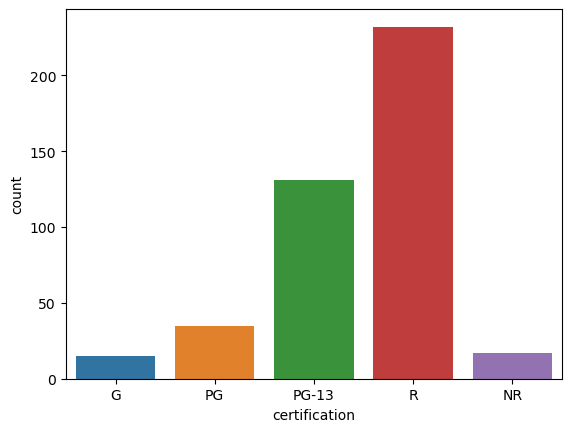

In [10]:
sns.countplot(data=plot_df, x='certification',order=cert_order);

### What is the average revenue per certification category?

In [11]:
df.groupby(['certification'])['revenue'].apply(lambda x:x.mean())

certification
G          7.041886e+07
NC-17      0.000000e+00
NR         2.232979e+06
PG         6.146695e+07
PG-13      7.146544e+07
R          1.616286e+07
Unrated    0.000000e+00
Name: revenue, dtype: float64

In [12]:
rev_cert = df([cert_order])[filter_financial].apply(lambda x:x.mean())
rev_cert

TypeError: 'DataFrame' object is not callable

### What is the average budget per certification category?

In [ ]:
df.groupby(['certification'])['budget'].apply(lambda x:x.mean())

In [ ]:
## Save current dataframe to file.
df.to_csv("Data/tmdb_results_combined.csv.gz",compression='gzip',index=False)

In [ ]:
# Open saved file and preview again
final_combo = pd.read_csv("Data/tmdb_results_combined.csv.gz", low_memory = False)
final_combo.head()

In [ ]:
df.info()

## Data was collected from TMBD
https://www.themoviedb.org/about/logos-attribution